# Kelp analysis

## 1. Libraries import

In [6]:
source('lib_import.R')
source('setup.R') 
library(gridExtra)
library(latex2exp)

[1] "setting up ggplot theme and colours"


## 2. Data import

In [7]:
data.path <- "data"

In [8]:
df.algae <- read.xlsx(paste(data.path,"kelp_thalli.xlsx",sep="/"),sheet="R - prepared",cols = 1:5,startRow = 2)
df.algae$depth <- factor(df.algae$depth,levels=c("7 [m]", "10 [m]"),ordered=TRUE)
head(df.algae)

,site,depth,quadrat,species,sporophytes
,<chr>,<ord>,<chr>,<chr>,<dbl>
1,S2,7 [m],A,Alaria esculenta,44
2,S2,7 [m],B,Alaria esculenta,76
3,S2,7 [m],C,Alaria esculenta,40
4,S2,7 [m],A,Saccharina latissima,12
5,S2,7 [m],B,Saccharina latissima,0
6,S2,7 [m],C,Saccharina latissima,0


## 3. Analysis
Standard error function

In [9]:
se <- function(x){ return(sd(x) / sqrt(length(x)))}

In [10]:
df.algae.summary <- df.algae %>% 
    group_by(site, depth, species) %>% 
        summarize(avg=round(mean(sporophytes),2),sd=round(sd(sporophytes),2),se=round(se(sporophytes),2)) %>%
            arrange(site,depth)

df.algae.summary

`summarise()` has grouped output by 'site', 'depth'. You can override using the
`.groups` argument.


site,depth,species,avg,sd,se
<chr>,<ord>,<chr>,<dbl>,<dbl>,<dbl>
S1,7 [m],Alaria esculenta,15.33,11.02,6.36
S1,7 [m],Desmarestia aculeata,1.33,2.31,1.33
S1,7 [m],Laminaria digitata,26.67,39.46,22.78
S1,7 [m],Saccharina latissima,21.33,15.14,8.74
S1,10 [m],Alaria esculenta,5.33,9.24,5.33
S1,10 [m],Desmarestia aculeata,0.00,0.00,0.00
S1,10 [m],Laminaria digitata,5.33,6.11,3.53
S1,10 [m],Saccharina latissima,37.33,12.22,7.06
S2,7 [m],Alaria esculenta,53.33,19.73,11.39


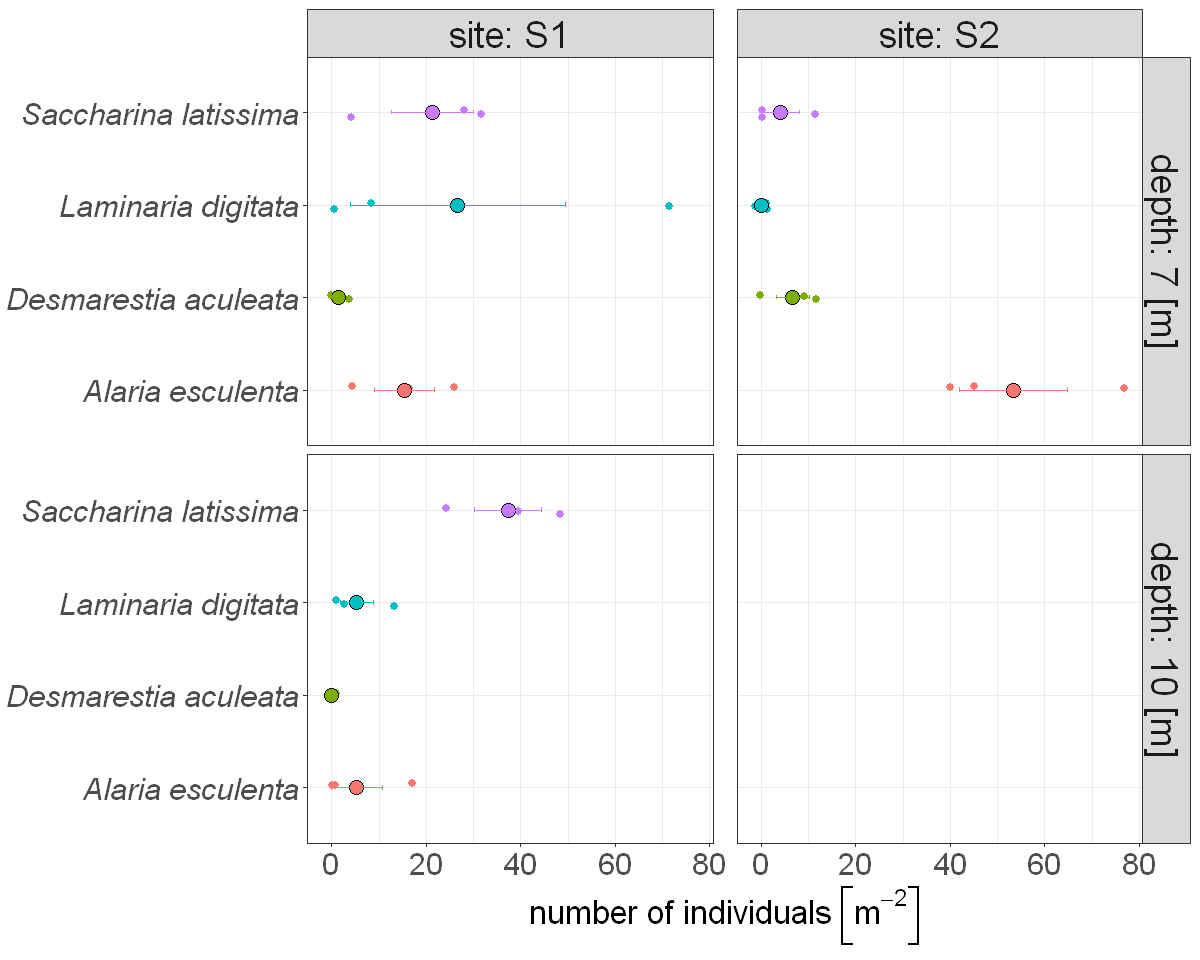

In [14]:
options(repr.plot.width=10, repr.plot.height=8)
ggplot() + 
geom_jitter(data=df.algae,aes(x=sporophytes,y=species,color=species),size=2,height=0.05) +
geom_point(data=df.algae.summary,aes(x=avg,y=species,fill=species),size=4,shape=21) +
geom_errorbarh(data=df.algae.summary, aes(y=species,xmin=avg-se,xmax=avg+se,color=species),width=.05)+
facet_grid(depth~site,labeller=label_both) +
xlab(TeX("number of individuals $\\left[m^{-2}\\right]$"))+
theme(  axis.title.x = element_text(size = 20), 
        axis.title.y = element_blank(),
        axis.text.x = element_text(size = 18),
        axis.text.y = element_text(size = 18,face="italic"),
      legend.position="none",
     strip.text = element_text(size = 22),
     panel.spacing.x = unit(1, "lines"))